# 初心者のための TensorFlow 2.0 入門

In [1]:
import tensorflow as tf
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [2]:
# mnistデータ取得
mnist = tf.keras.datasets.mnist

# 学習データと検証データに分割
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # 28x28の２次元データを784の１次元データに平滑化。
  tf.keras.layers.Dense(128, activation='relu'),   # 出力を128に設定し、全結合。活性化関数はrelu。
  tf.keras.layers.Dropout(0.2),   # 0.2%を次のノードに伝えない。
  tf.keras.layers.Dense(10)   # 全結合。出力は１０分類の「１０」。
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions_tensor = model(x_train[:1])
print(f"predictions={predictions}")
print(f"predictions_tensor={predictions_tensor}")

predictions=[[-0.44439182 -0.04019667  0.11102664  0.20543712  0.10932892  0.137478
   0.2672064  -0.09041736  0.16276312  0.6562215 ]]
predictions_tensor=[[-0.44439182 -0.04019667  0.11102664  0.20543712  0.10932892  0.137478
   0.2672064  -0.09041736  0.16276312  0.6562215 ]]


In [5]:
# ネットワークの最終レイヤーに対する活性化関数として組み込むことは可能。
# モデルの出力に対して直接的に解釈できる一方で、ソフトマックスの出力を用いる場合、
# すべてのモデルに対して正確で数値的安定に損失を計算できないため、このアプローチは推奨されない。
tf.nn.softmax(predictions).numpy()

array([[0.05559185, 0.08328194, 0.09687824, 0.10647024, 0.09671392,
        0.099475  , 0.11325418, 0.07920274, 0.10202231, 0.1671096 ]],
      dtype=float32)

In [6]:
# この損失は、クラスが正しい確率の対数をとって符号を反転させたもの。
# この値はモデルがこのクラスが正しいと確信しているときに 0 になりる。
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# この訓練されていないモデルはランダムに近い確率 (それぞれのクラスについて 1/10) を出力する。
# 最初の損失は -tf.log(1/10) ~= 2.3 に近い値になるはず。

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.307849

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
# 学習
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 805us/step - loss: 0.4917 - accuracy: 0.8578
Epoch 2/5
1875/1875 [==============================] - 2s 928us/step - loss: 0.1494 - accuracy: 0.9561
Epoch 3/5
1875/1875 [==============================] - 2s 889us/step - loss: 0.1086 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 2s 892us/step - loss: 0.0898 - accuracy: 0.9718
Epoch 5/5
1875/1875 [==============================] - 2s 862us/step - loss: 0.0746 - accuracy: 0.9761


In [10]:
# 精度検証
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0706 - accuracy: 0.9775


[0.07064929604530334, 0.9775000214576721]

In [11]:
# 確率を返すように、モデルをラップしてソフトマックス関数を適用。
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [12]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[5.98791075e-07, 4.31483071e-09, 3.45883245e-06, 2.18408968e-04,
        7.91592208e-11, 1.10303654e-06, 9.50328249e-13, 9.99755681e-01,
        6.13515886e-06, 1.45620206e-05],
       [1.48266244e-08, 5.87109476e-04, 9.99409676e-01, 3.79604650e-08,
        9.23185378e-17, 6.26535609e-07, 2.02711999e-06, 1.00225362e-12,
        4.23725425e-07, 2.45901898e-14],
       [1.13235665e-05, 9.99312401e-01, 1.08904278e-04, 1.93725900e-05,
        1.54880963e-05, 5.80604274e-06, 1.36709350e-05, 3.11228010e-04,
        1.96311317e-04, 5.51524090e-06],
       [9.99920964e-01, 8.59994298e-11, 4.41561860e-05, 1.41950849e-07,
        1.65563421e-07, 1.20092091e-05, 6.87966349e-06, 1.11660402e-05,
        1.48595475e-07, 4.32474644e-06],
       [2.07995472e-05, 2.04984634e-08, 3.22829487e-06, 1.81246875e-07,
        9.96569991e-01, 9.59122008e-06, 1.07821143e-05, 4.89730970e-04,
        5.05931212e-07, 2.89514195e-03]], dtype=float32)>

# はじめてのニューラルネットワーク：分類問題の初歩

[はじめてのニューラルネットワーク：分類問題の初歩](https://www.tensorflow.org/tutorials/keras/classification?hl=ja)

In [13]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [14]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
# ラベルのクラス名
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
# データ観察
train_images.shape

(60000, 28, 28)

In [17]:
len(train_labels)

60000

In [18]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
len(test_labels)

10000

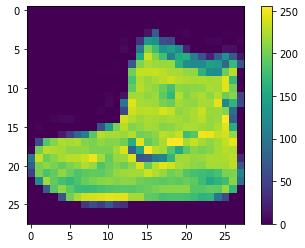

In [21]:
# 可視化
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
# 前処理

# 0~1にスケール
train_images = train_images / 255.0
test_images = test_images / 255.0

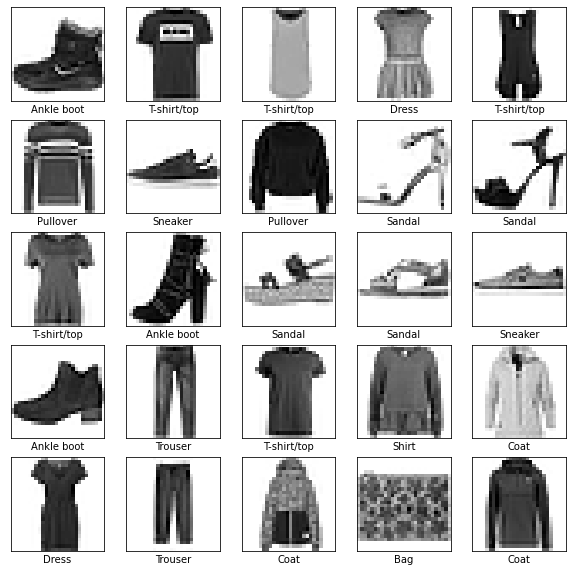

In [23]:
# 訓練用データセットの最初の25枚の画像を、クラス名付きで表示。
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
# モデル構築
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')   # 合計が1になる10個の確率の配列を返す。
])

In [25]:
# モデルのコンパイル
# 損失関数（loss function） —訓練中のモデルが不正確であるほど大きな値となる関数。この関数の値を最小化し、訓練中のモデルを正しい方向に向かわせる。
# オプティマイザ（optimizer）—モデルが見ているデータと、損失関数の値から、どのようにモデルを更新するかを決定。
# メトリクス（metrics） —訓練とテストのステップを監視するのに使用。下記の例ではaccuracy （正解率）、つまり、画像が正しく分類された比率を使用。

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# モデルの訓練
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 848us/step - loss: 0.6324 - accuracy: 0.7784
Epoch 2/5
1875/1875 [==============================] - 2s 867us/step - loss: 0.3910 - accuracy: 0.8578
Epoch 3/5
1875/1875 [==============================] - 2s 821us/step - loss: 0.3408 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 2s 858us/step - loss: 0.3203 - accuracy: 0.8808
Epoch 5/5
1875/1875 [==============================] - 2s 833us/step - loss: 0.2979 - accuracy: 0.8916


In [27]:
# 正解率の評価
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3715 - accuracy: 0.8634

Test accuracy: 0.8633999824523926


In [28]:
# 予測
predictions = model.predict(test_images)

In [29]:
predictions[0]

array([1.3245498e-06, 2.9693836e-09, 2.7274675e-07, 3.9647423e-07,
       2.0611463e-07, 2.3123648e-03, 4.2014294e-06, 6.5101911e-03,
       3.6563692e-06, 9.9116737e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

In [32]:
# 10チャンネル全てをグラフ化
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

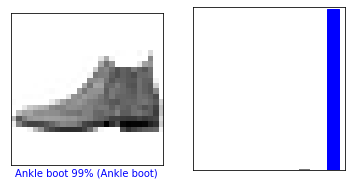

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

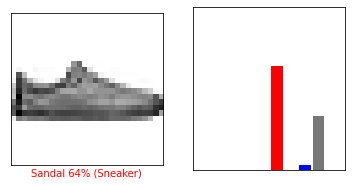

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

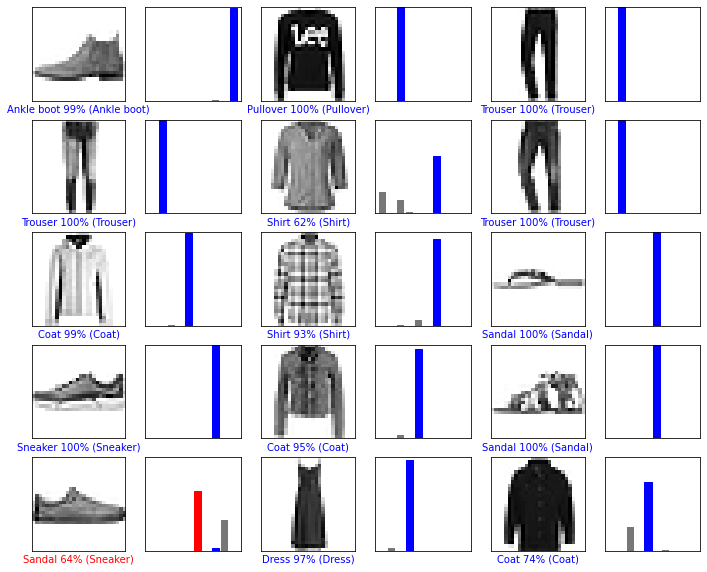

In [35]:
# X個のテスト画像、予測されたラベル、正解ラベルを表示します。
# 正しい予測は青で、間違った予測は赤で表示しています。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [36]:
# 1枚の画像で予測
# テスト用データセットから画像を1枚取り出す
img = test_images[0]

print(img.shape)

(28, 28)


In [37]:
# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [38]:
# 予測
predictions_single = model.predict(img)

print(predictions_single)

[[1.3245448e-06 2.9693781e-09 2.7274598e-07 3.9647423e-07 2.0611482e-07
  2.3123638e-03 4.2014212e-06 6.5101911e-03 3.6563656e-06 9.9116737e-01]]


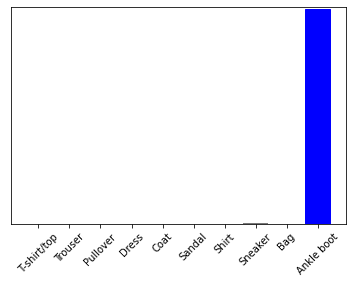

In [39]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
np.argmax(predictions_single[0])

9

# 映画レビューのテキスト分類

[映画レビューのテキスト分類](https://www.tensorflow.org/tutorials/keras/text_classification?hl=ja)

In [41]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.4.0


In [42]:
# データセットダウンロード
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/envs/local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/envs/local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

In [43]:
# データ確認
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print(train_data[0])
len(train_data[0]), len(train_data[1])

Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


(218, 189)

In [44]:
# 整数を単語に変換

# 単語を整数にマッピングする辞書
word_index = imdb.get_word_index()

# インデックスの最初の方は予約済み
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [45]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [46]:
# データの準備

# テンソルに変換
# 配列をワンホット（one-hot）エンコーディングと同じように、単語の出現を表す0と1のベクトルに変換。
# 例えば、[3, 5]という配列は、インデックス3と5を除いてすべてゼロの10,000次元のベクトルになる。
# そして、これをネットワークの最初の層、すなわち、浮動小数点のベクトルデータを扱うことができるDense（全結合）層とする。
# ただし、これは単語数×レビュー数の行列が必要なメモリ集約的な方法。

# もう一つの方法では、配列をパディングによって同じ長さに揃え、サンプル数 * 長さの最大値の形の整数テンソルにする。
# そして、この形式を扱うことができるEmbedding（埋め込み）層をネットワークの最初の層にする。

# pad_sequences：長さを標準化する関数

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [47]:
# サンプルの長さ確認
len(train_data[0]), len(train_data[1])

(256, 256)

In [48]:
# パディング済みの最初のサンプル確認
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [49]:
# モデルの構築
# モデルを作成する際、以下の２つの決定が必要。
# モデルにいくつの層を設けるか？
# 層ごとに何個の隠れユニットを使用するか？

# 入力の形式は映画レビューで使われている語彙数（10,000語）
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))   # 埋め込み層。整数にエンコードされた語彙を受け取り、それぞれの単語インデックスに対応する埋め込みベクトルを検索。ベクトル化のために、出力行列には次元が１つ追加
model.add(keras.layers.GlobalAveragePooling1D())   # １次元のグローバル平均プーリング層。それぞれのサンプルについて、シーケンスの次元方向に平均値をもとめ、固定長のベクトルを返す。モデルは最も単純な形で、可変長の入力を扱うことができるようになる。
model.add(keras.layers.Dense(16, activation='relu'))   # 16個の隠れユニットを持つ全結合（Dense）層。
model.add(keras.layers.Dense(1, activation='sigmoid'))   # 1個の出力ノードに全結合。シグモイド（sigmoid）活性化関数を使うことで、値は確率あるいは確信度を表す0と1の間の浮動小数点数となる。

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [50]:
# モデルのオプティマイザと損失関数を設定
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
# 検証用データ作成
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [52]:
# モデルの訓練
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 16ms/step - loss: 0.6924 - accuracy: 0.5621 - val_loss: 0.6892 - val_accuracy: 0.6760
Epoch 2/40
30/30 [==============================] - 0s 7ms/step - loss: 0.6868 - accuracy: 0.7053 - val_loss: 0.6798 - val_accuracy: 0.7231
Epoch 3/40
30/30 [==============================] - 0s 7ms/step - loss: 0.6746 - accuracy: 0.7478 - val_loss: 0.6619 - val_accuracy: 0.7276
Epoch 4/40
30/30 [==============================] - 0s 7ms/step - loss: 0.6523 - accuracy: 0.7578 - val_loss: 0.6336 - val_accuracy: 0.7638
Epoch 5/40
30/30 [==============================] - 0s 7ms/step - loss: 0.6175 - accuracy: 0.7895 - val_loss: 0.5963 - val_accuracy: 0.7672
Epoch 6/40
30/30 [==============================] - 0s 7ms/step - loss: 0.5737 - accuracy: 0.8110 - val_loss: 0.5534 - val_accuracy: 0.7994
Epoch 7/40
30/30 [==============================] - 0s 7ms/step - loss: 0.5284 - accuracy: 0.8271 - val_loss: 0.5098 - val_accuracy: 0.8196
Epoch 8/40
30/30 [=

In [53]:
# モデルの評価
results = model.evaluate(test_data,  test_labels, verbose=2)
print(results)

782/782 - 0s - loss: 0.3325 - accuracy: 0.8721
[0.33248016238212585, 0.8720800280570984]


In [54]:
# 正解率と損失の時系列グラフを描く
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

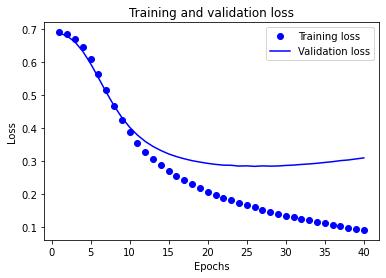

In [55]:
# 点が訓練時の損失と正解率を、実線が検証時の損失と正解率
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

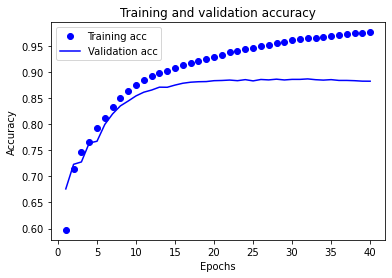

In [56]:
plt.clf()   # 図のクリア

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [57]:
# 過学習を起こしている。

# TensorFlow Hub によるテキストの分類: 映画レビュー

[TensorFlow Hub によるテキストの分類: 映画レビュー](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub?hl=ja)

- 入力データは文章で構成。
- 予測するラベルは、0 または 1。
- トレーニング済みのテキスト埋め込みを最初のレイヤーとして使用することでメリットがある。
1. テキストの事前処理を心配する必要がない。
2. 変換学習を利用できる。
3. 埋め込みのサイズは固定されているため、処理しやすい。


In [58]:
import numpy as np

import tensorflow as tf

!pip install -q tensorflow-hub
!pip install -q tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.4.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


In [59]:
# IMDB データセットをダウンロード
# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [60]:
# データを確認
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [61]:
# 最初の 10 個のラベル出力
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [62]:
# モデルを構築
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [63]:
model = tf.keras.Sequential()
# 文章から埋め込みベクトルにマッピングするために、トレーニング済みの SavedModel を使用。
# 使用中のトレーニング済みのテキスト埋め込みモデルは文章をトークンに分割し、各トークンを埋め込んで、埋め込みを組み合わせる。
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_6 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [64]:
# 損失関数とオプティマイザ
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
# モデルをトレーニング
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.8558 - accuracy: 0.5164 - val_loss: 0.7076 - val_accuracy: 0.5528
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.6907 - accuracy: 0.5716 - val_loss: 0.6667 - val_accuracy: 0.5918
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6527 - accuracy: 0.6044 - val_loss: 0.6324 - val_accuracy: 0.6277
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6124 - accuracy: 0.6475 - val_loss: 0.5956 - val_accuracy: 0.6547
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5732 - accuracy: 0.6785 - val_loss: 0.5578 - val_accuracy: 0.6906
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5291 - accuracy: 0.7148 - val_loss: 0.5197 - val_accuracy: 0.7291
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4900 - accuracy: 0.7556 - val_loss: 0.4843 - val_accuracy: 0.7583
Epoch 8/20
30

In [66]:
# モデルを評価
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

49/49 - 1s - loss: 0.3213 - accuracy: 0.8532
loss: 0.321
accuracy: 0.853


# 回帰：燃費を予測する

[回帰：燃費を予測する](https://www.tensorflow.org/tutorials/keras/regression?hl=ja)

In [67]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.0


In [68]:
# Auto MPG データセット取得
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/Users/akira/.keras/datasets/auto-mpg.data'

In [69]:
# pandasを使用してインポート
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [70]:
# データの確認
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [71]:
# 欠損値の削除
dataset = dataset.dropna()

In [72]:
origin = dataset.pop('Origin')

In [73]:
# One-Hotエンコーディング
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [74]:
# データを訓練用セットとテスト用セットに分割
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

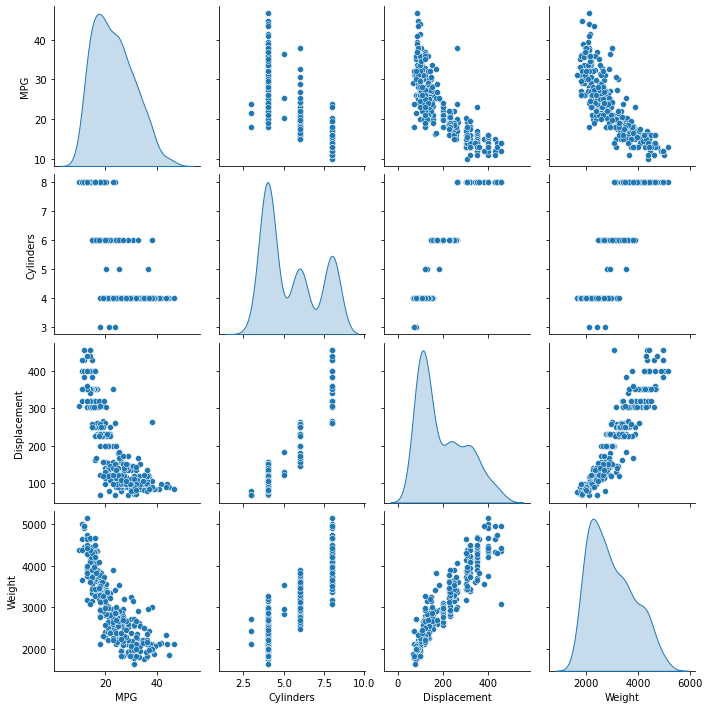

In [75]:
# データの観察
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [76]:
# 全体の統計値を確認
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [77]:
# ラベルと特徴量の分離
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [78]:
# データの正規化
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [79]:
# モデルの構築
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
      ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [80]:
model = build_model()

In [81]:
# モデルの要約
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [82]:
# 10個のサンプルからなるバッチでモデルの検証
example_batch = np.array(normed_train_data[:10])
example_result = model.predict(example_batch)
example_result

array([[ 0.19136317],
       [ 0.2251967 ],
       [-0.01867269],
       [ 0.35551345],
       [ 0.44364697],
       [ 0.20377237],
       [ 0.47594148],
       [-0.02230369],
       [-0.0204651 ],
       [ 0.30099052]], dtype=float32)

In [83]:
# モデルの訓練
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
    np.array(normed_train_data), np.array(train_labels),
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [84]:
# モデルの訓練の様子を可視化
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.727963,1.082119,2.727963,10.644114,2.617753,10.644114,995
996,2.424506,1.022438,2.424506,10.222491,2.537441,10.222491,996
997,2.847579,1.082944,2.847579,10.099565,2.553475,10.099565,997
998,2.421082,1.001721,2.421082,10.199598,2.591686,10.199598,998
999,2.554733,1.011346,2.554733,9.268970,2.342348,9.268970,999


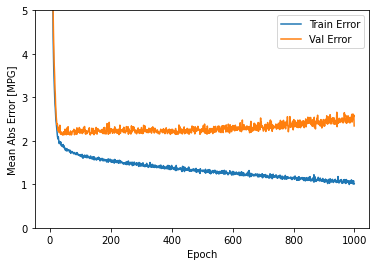

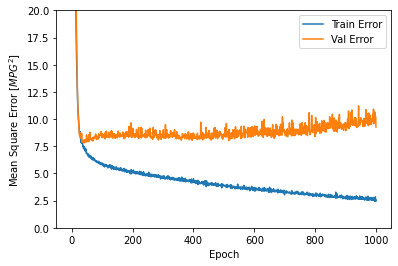

In [85]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
             label='Train Error'
            )
    
    plt.plot(hist['epoch'], hist['val_mae'],
             label = 'Val Error'
            )
    
    plt.ylim([0,5])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error'
            )
    plt.plot(hist['epoch'], 
             hist['val_mse'],
             label='Val Error'
            )
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)


................................................

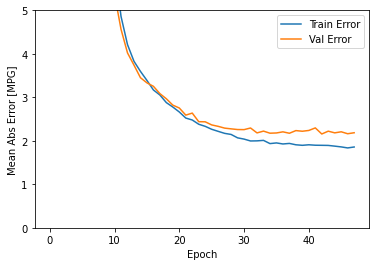

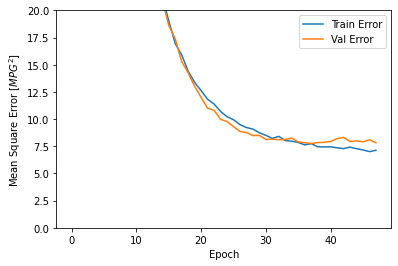

In [86]:
# エポック毎に訓練状態をチェック
model = build_model()

# patience は改善が見られるかを監視するエポック数を表すパラメーター
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [87]:
# テスト用データセットで検証
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.6809 - mae: 1.8454 - mse: 5.6809
Testing set Mean Abs Error:  1.85 MPG


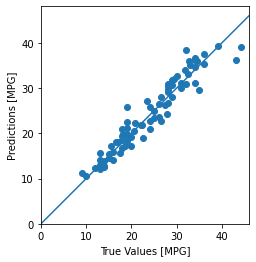

In [88]:
# モデルを使った予測
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

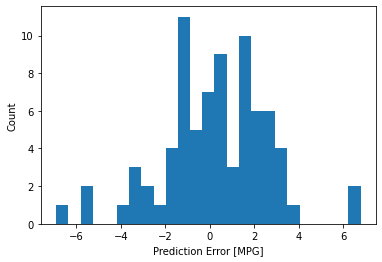

In [89]:
# 誤差の分布
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# 過学習と学習不足について知る
[過学習と学習不足について知る](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ja)

- 訓練データを増やす
- ネットワークの容量をへらす
- 重みの正則化を行う
- ドロップアウトを追加する

In [90]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [91]:
# IMDBデータセットのダウンロード
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 形状が (len(sequences), dimension)ですべて0の行列を作る
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # 特定のインデックスに対してresults[i] を１に設定する
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/envs/local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/envs/local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

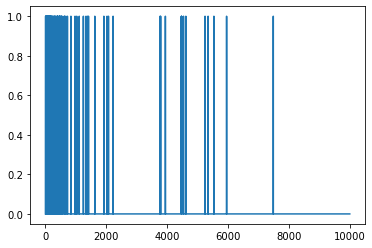

In [92]:
# 分布の確認
plt.plot(train_data[0])

In [93]:
# 過学習のデモ
# 過学習を防止するための最も単純な方法は、モデルのサイズ、すなわち、モデル内の学習可能なパラメータの数を小さくする。

# 比較基準を作る
baseline_model = keras.Sequential([
    # `.summary` を見るために`input_shape`が必要 
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [94]:
# 訓練
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.4604 - accuracy: 0.8116 - binary_crossentropy: 0.4604 - val_loss: 0.3212 - val_accuracy: 0.8796 - val_binary_crossentropy: 0.3212
Epoch 2/20
49/49 - 1s - loss: 0.2347 - accuracy: 0.9154 - binary_crossentropy: 0.2347 - val_loss: 0.2861 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.2861
Epoch 3/20
49/49 - 0s - loss: 0.1743 - accuracy: 0.9394 - binary_crossentropy: 0.1743 - val_loss: 0.2989 - val_accuracy: 0.8812 - val_binary_crossentropy: 0.2989
Epoch 4/20
49/49 - 0s - loss: 0.1406 - accuracy: 0.9523 - binary_crossentropy: 0.1406 - val_loss: 0.3321 - val_accuracy: 0.8729 - val_binary_crossentropy: 0.3321
Epoch 5/20
49/49 - 0s - loss: 0.1151 - accuracy: 0.9625 - binary_crossentropy: 0.1151 - val_loss: 0.3493 - val_accuracy: 0.8736 - val_binary_crossentropy: 0.3493
Epoch 6/20
49/49 - 0s - loss: 0.0912 - accuracy: 0.9722 - binary_crossentropy: 0.0912 - val_loss: 0.3821 - val_accuracy: 0.8693 - val_binary_crossentropy: 0.3821
Epoch 7/20
49/49 - 0s - loss

In [95]:
# より小さいモデルの構築
# 隠れユニット数が少ないモデルを作成
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [96]:
# 訓練
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6426 - accuracy: 0.6188 - binary_crossentropy: 0.6426 - val_loss: 0.5895 - val_accuracy: 0.7218 - val_binary_crossentropy: 0.5895
Epoch 2/20
49/49 - 1s - loss: 0.5370 - accuracy: 0.7916 - binary_crossentropy: 0.5370 - val_loss: 0.5180 - val_accuracy: 0.8270 - val_binary_crossentropy: 0.5180
Epoch 3/20
49/49 - 1s - loss: 0.4674 - accuracy: 0.8702 - binary_crossentropy: 0.4674 - val_loss: 0.4745 - val_accuracy: 0.8692 - val_binary_crossentropy: 0.4745
Epoch 4/20
49/49 - 1s - loss: 0.4203 - accuracy: 0.9047 - binary_crossentropy: 0.4203 - val_loss: 0.4547 - val_accuracy: 0.8736 - val_binary_crossentropy: 0.4547
Epoch 5/20
49/49 - 1s - loss: 0.3886 - accuracy: 0.9245 - binary_crossentropy: 0.3886 - val_loss: 0.4445 - val_accuracy: 0.8722 - val_binary_crossentropy: 0.4445
Epoch 6/20
49/49 - 1s - loss: 0.3623 - accuracy: 0.9393 - binary_crossentropy: 0.3623 - val_loss: 0.4356 - val_accuracy: 0.8766 - val_binary_crossentropy: 0.4356
Epoch 7/20
49/49 - 1s - loss

In [97]:
# より大きなモデルの構築
# 過学習を起こす
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [98]:
# 訓練
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 11s - loss: 0.3486 - accuracy: 0.8546 - binary_crossentropy: 0.3486 - val_loss: 0.2862 - val_accuracy: 0.8850 - val_binary_crossentropy: 0.2862
Epoch 2/20
49/49 - 8s - loss: 0.1343 - accuracy: 0.9521 - binary_crossentropy: 0.1343 - val_loss: 0.3361 - val_accuracy: 0.8705 - val_binary_crossentropy: 0.3361
Epoch 3/20
49/49 - 9s - loss: 0.0452 - accuracy: 0.9869 - binary_crossentropy: 0.0452 - val_loss: 0.4345 - val_accuracy: 0.8690 - val_binary_crossentropy: 0.4345
Epoch 4/20
49/49 - 9s - loss: 0.0060 - accuracy: 0.9990 - binary_crossentropy: 0.0060 - val_loss: 0.6080 - val_accuracy: 0.8685 - val_binary_crossentropy: 0.6080
Epoch 5/20
49/49 - 8s - loss: 6.0298e-04 - accuracy: 1.0000 - binary_crossentropy: 6.0298e-04 - val_loss: 0.6973 - val_accuracy: 0.8699 - val_binary_crossentropy: 0.6973
Epoch 6/20
49/49 - 9s - loss: 2.9033e-04 - accuracy: 1.0000 - binary_crossentropy: 2.9033e-04 - val_loss: 0.7410 - val_accuracy: 0.8704 - val_binary_crossentropy: 0.7410
Epoch 7/20


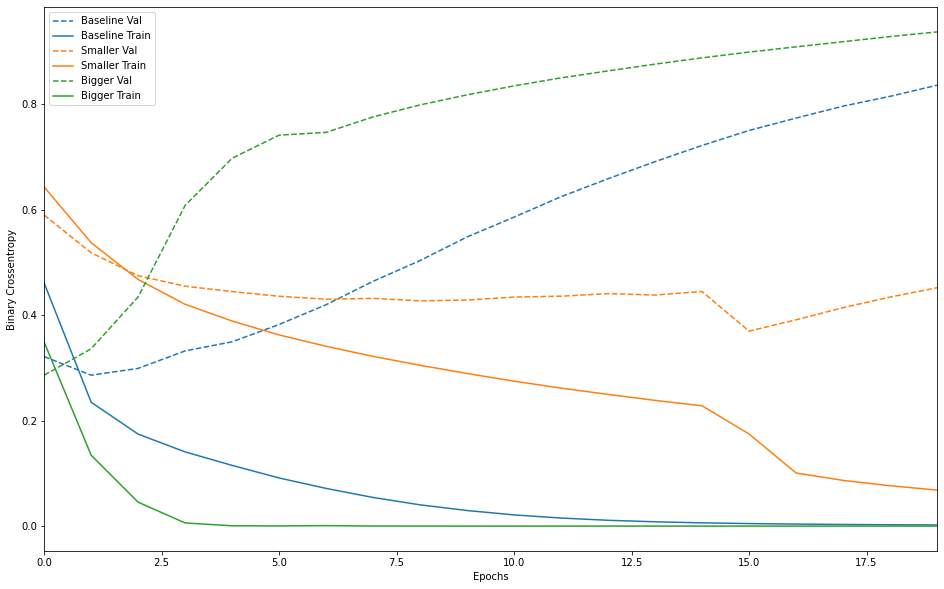

In [99]:
# 訓練時と検証時の損失をグラフにする
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [100]:
# より大きなネットワークでは、すぐに、1エポックで過学習が始まり、その度合も強い。
# ネットワークの容量が大きいほど訓練用データをモデル化するスピードが早くなる（結果として訓練時の損失値が小さくなり）が、より過学習しやすく（結果として訓練時の損失値と検証時の損失値が大きく乖離しやすく）なる。

In [101]:
# 過学習防止の戦略
# オッカムの剃刀
# 何かの説明が2つあるとすると、最も正しいと考えられる説明は、仮定の数が最も少ない「一番単純な」説明だというもの。
# ある訓練用データとネットワーク構造があって、そのデータを説明できる重みの集合が複数ある時（つまり、複数のモデルがある時）、単純なモデルのほうが複雑なものよりも過学習しにくい。
# 重みが小さい値のみをとることで、重み値の分布がより整然となる（正則）様に制約を与える。
# L1正則化 : 重み係数の絶対値に比例するコストを加える。重みパラメータの一部を0にすることでモデルを疎にする効果。
# L2正則化（重み減衰） : 重み係数の二乗に比例するコストを加える。重みパラメータにペナルティを加えますがモデルを疎にすることはない。
# 層の重み行列の係数全てに対して0.001 * 重み係数の値 **2をネットワークの損失値合計に加える。

l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5451 - accuracy: 0.7894 - binary_crossentropy: 0.5077 - val_loss: 0.3986 - val_accuracy: 0.8730 - val_binary_crossentropy: 0.3615
Epoch 2/20
49/49 - 1s - loss: 0.3159 - accuracy: 0.9048 - binary_crossentropy: 0.2744 - val_loss: 0.3360 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2911
Epoch 3/20
49/49 - 1s - loss: 0.2592 - accuracy: 0.9255 - binary_crossentropy: 0.2116 - val_loss: 0.3326 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2829
Epoch 4/20
49/49 - 1s - loss: 0.2339 - accuracy: 0.9361 - binary_crossentropy: 0.1824 - val_loss: 0.3414 - val_accuracy: 0.8842 - val_binary_crossentropy: 0.2889
Epoch 5/20
49/49 - 1s - loss: 0.2181 - accuracy: 0.9445 - binary_crossentropy: 0.1643 - val_loss: 0.3524 - val_accuracy: 0.8809 - val_binary_crossentropy: 0.2978
Epoch 6/20
49/49 - 1s - loss: 0.2051 - accuracy: 0.9492 - binary_crossentropy: 0.1497 - val_loss: 0.3647 - val_accuracy: 0.8777 - val_binary_crossentropy: 0.3089
Epoch 7/20
49/49 - 1s - loss

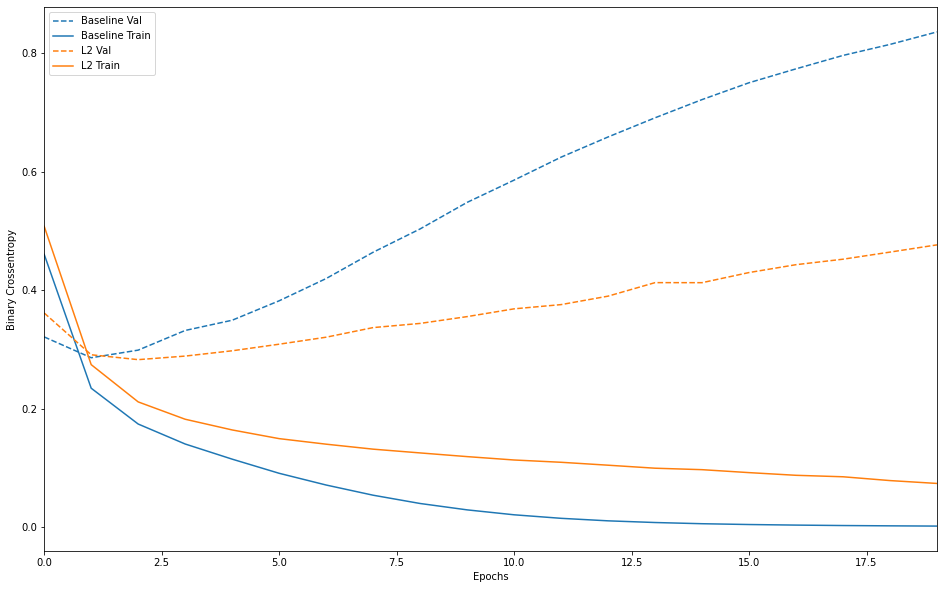

In [102]:
# l2正則化の効果検証
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [103]:
# ドロップアウトを追加する
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6174 - accuracy: 0.6537 - binary_crossentropy: 0.6174 - val_loss: 0.4581 - val_accuracy: 0.8570 - val_binary_crossentropy: 0.4581
Epoch 2/20
49/49 - 1s - loss: 0.4470 - accuracy: 0.8116 - binary_crossentropy: 0.4470 - val_loss: 0.3308 - val_accuracy: 0.8826 - val_binary_crossentropy: 0.3308
Epoch 3/20
49/49 - 1s - loss: 0.3499 - accuracy: 0.8654 - binary_crossentropy: 0.3499 - val_loss: 0.2833 - val_accuracy: 0.8884 - val_binary_crossentropy: 0.2833
Epoch 4/20
49/49 - 1s - loss: 0.2915 - accuracy: 0.8966 - binary_crossentropy: 0.2915 - val_loss: 0.2740 - val_accuracy: 0.8899 - val_binary_crossentropy: 0.2740
Epoch 5/20
49/49 - 1s - loss: 0.2422 - accuracy: 0.9202 - binary_crossentropy: 0.2422 - val_loss: 0.2760 - val_accuracy: 0.8892 - val_binary_crossentropy: 0.2760
Epoch 6/20
49/49 - 1s - loss: 0.2070 - accuracy: 0.9292 - binary_crossentropy: 0.2070 - val_loss: 0.2893 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2893
Epoch 7/20
49/49 - 1s - loss

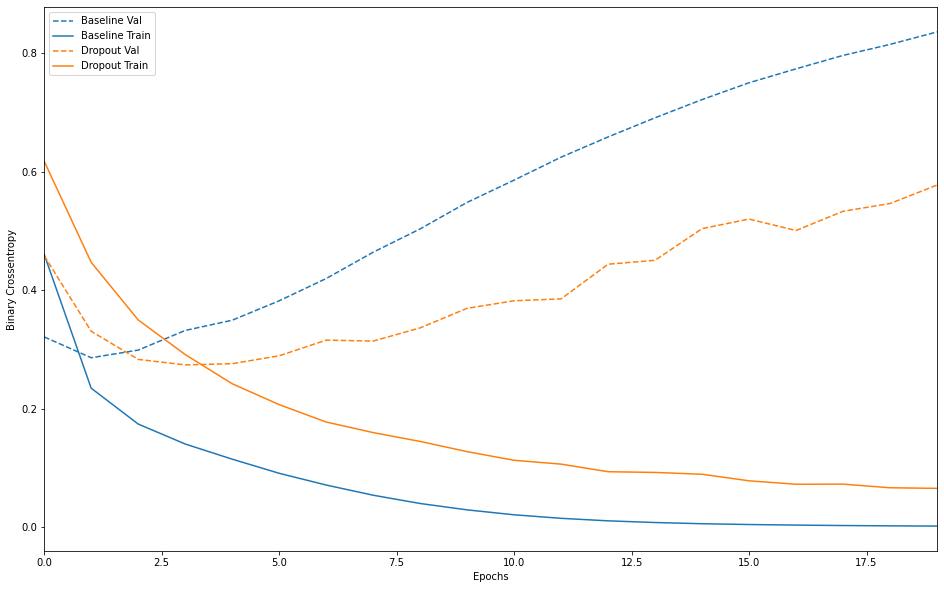

In [104]:
# 可視化
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

# モデルの保存と復元
[モデルの保存と復元](https://www.tensorflow.org/tutorials/keras/save_and_load?hl=ja)
以下のものを共有する。
- モデルを構築するプログラム
- 学習済みモデルの重みあるいはパラメータ

### 設定

In [105]:
# インストールとインポート
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.4.0


In [106]:
# サンプルデータセットの取得
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

In [107]:
# モデルの定義
# 短いシーケンシャルモデルを返す関数
def create_model():
    model = tf.keras.models.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
      ])

    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# 基本的なモデルのインスタンスを作成
model = create_model()

# モデルの構造を表示
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 訓練中にチェックポイントを保存する
- 主な用途は訓練の途中あるいは終了後にチェックポイントを自動的に保存する。
- 再び訓練を行うことなくモデルを使用することができ、また、訓練が中断された場合に、中止したところから再開できる。

In [108]:
# チェックポイントコールバックの使い方
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# チェックポイントコールバックを作る
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

# 新しいコールバックを用いるようモデルを訓練
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback])  # 訓練にコールバックを渡す

# オプティマイザの状態保存についての警告が表示されるかもしれません。
# これらの警告は（このノートブックで発生する同様な警告を含めて）
# 古い用法を非推奨にするためのもので、無視して構いません。

Epoch 1/10
32/32 [==============================] - 0s 7ms/step - loss: 1.5682 - accuracy: 0.5176 - val_loss: 0.7242 - val_accuracy: 0.7640

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4693 - accuracy: 0.8853 - val_loss: 0.5664 - val_accuracy: 0.8180

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.2614 - accuracy: 0.9396 - val_loss: 0.4681 - val_accuracy: 0.8560

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.1939 - accuracy: 0.9566 - val_loss: 0.4410 - val_accuracy: 0.8580

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.1459 - accuracy: 0.9762 - val_loss: 0.4332 - val_accuracy: 0.8460

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/10
32/32 [==============================] - 0s 

In [109]:
# TensorFlowチェックポイントファイルの確認
!ls {checkpoint_dir}

checkpoint                  cp.ckpt.index
cp.ckpt.data-00000-of-00001


In [110]:
# 訓練せずに検証
model = create_model()

loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 2.4134 - accuracy: 0.1110
Untrained model, accuracy: 11.10%


In [111]:
# チェックポイントから重みをロードし、再び評価。
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4123 - accuracy: 0.8630
Restored model, accuracy: 86.30%


In [112]:
# チェックポイントコールバックのオプション
# 新しいモデルを訓練し、5エポックごとに一意な名前のチェックポイントを保存。
# ファイル名に(`str.format`を使って)エポック数を埋め込む
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 5エポックごとにモデルの重みを保存するコールバックを作成
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)

# 新しいモデルのインスタンスを作成
model = create_model()

# `checkpoint_path` フォーマットで重みを保存
model.save_weights(checkpoint_path.format(epoch=0))

# 新しいコールバックを使い、モデルを訓練
model.fit(train_images, 
          train_labels,
          epochs=50, 
          callbacks=[cp_callback],
          validation_data=(test_images,test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [113]:
!ls {checkpoint_dir}

checkpoint                       cp-0025.ckpt.index
cp-0000.ckpt.data-00000-of-00001 cp-0030.ckpt.data-00000-of-00001
cp-0000.ckpt.index               cp-0030.ckpt.index
cp-0005.ckpt.data-00000-of-00001 cp-0035.ckpt.data-00000-of-00001
cp-0005.ckpt.index               cp-0035.ckpt.index
cp-0010.ckpt.data-00000-of-00001 cp-0040.ckpt.data-00000-of-00001
cp-0010.ckpt.index               cp-0040.ckpt.index
cp-0015.ckpt.data-00000-of-00001 cp-0045.ckpt.data-00000-of-00001
cp-0015.ckpt.index               cp-0045.ckpt.index
cp-0020.ckpt.data-00000-of-00001 cp-0050.ckpt.data-00000-of-00001
cp-0020.ckpt.index               cp-0050.ckpt.index
cp-0025.ckpt.data-00000-of-00001


In [114]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0050.ckpt'

In [115]:
# モデルをリセットし最後のチェックポイントをロード
# 新しいモデルのインスタンスを作成
model = create_model()

# 先ほど保存した重みを読み込み
model.load_weights(latest)

# モデルを再評価
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4860 - accuracy: 0.8780
Restored model, accuracy: 87.80%


# チェックポイントには何が含まれている？

- １つ以上のモデルの重みの断片
- どの重みがどの断片に保存されているかを示すインデックスファイル

In [116]:
# 手動で重みを保存する
# 重みの保存
model.save_weights('./checkpoints/my_checkpoint')

# 新しいモデルのインスタンスを作成
model = create_model()

# 重みの復元
model.load_weights('./checkpoints/my_checkpoint')

# モデルの評価
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4860 - accuracy: 0.8780
Restored model, accuracy: 87.80%


In [117]:
# モデル全体の保存
# model.saveを呼ぶことで、モデルのアーキテクチャや重み、訓練の設定を単一のファイル/フォルダに保存できる。
# オプティマイザーの状態も復旧されるため、中断した箇所から訓練を再開できる。
# SavedModelとHDF5の２つの方法で保存することができる。

# SavedModel フォーマットとして
# tf.keras.models.load_model を用いてリストアできる。
# TensorFlow Serving との互換性もある。
# 新しいモデルのインスタンスを作成して訓練
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# モデル全体を SavedModel として保存
!mkdir -p saved_model
model.save('saved_model/my_model')

Epoch 1/5
32/32 [==============================] - 0s 3ms/step - loss: 1.5381 - accuracy: 0.5557
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.4664 - accuracy: 0.8651
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2849 - accuracy: 0.9257
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9450
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.9720
INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [118]:
# SavedModel フォーマットはバイナリ形式の protobuf と TensorFlow checkpoint を含んだディレクトリ。
# SavedModel ディレクトリの中を確認
# my_model ディレクトリ
!ls saved_model

# assets フォルダと saved_model.pb, variables フォルダが含まれる
!ls saved_model/my_model

my_model
assets         saved_model.pb variables


In [119]:
# SavedModel を読み込んで新しい Keras モデルを作成
new_model = tf.keras.models.load_model('saved_model/my_model')

# アーキテクチャを確認
new_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [120]:
# リストアされたモデルは元のモデルと同じ引数を用いてコンパイルされる。
# 読み込んだモデルを用いて評価と予測を行う。
# リストアされたモデルを評価
loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

print(new_model.predict(test_images).shape)

32/32 - 0s - loss: 0.4464 - accuracy: 0.8560
Restored model, accuracy: 85.60%
(1000, 10)


In [121]:
# HDF5ファイルとして
# 新しいモデルのインスタンスを作成して訓練
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# HDF5 ファイルにモデル全体を保存
# 拡張子 '.h5' はモデルが HDF5 で保存されているということを暗示する
model.save('my_model.h5')

Epoch 1/5
32/32 [==============================] - 0s 3ms/step - loss: 1.6174 - accuracy: 0.5097
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.8828
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.9255
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9568
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1518 - accuracy: 0.9779


In [122]:
# 保存したファイルを使ってモデルを再作成
# 同じモデルを読み込んで、重みやオプティマイザーを含むモデル全体を再作成
new_model = tf.keras.models.load_model('my_model.h5')

# モデルのアーキテクチャを表示
new_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [123]:
# 正解率を検査
loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.4272 - accuracy: 0.8550
Restored model, accuracy: 85.50%


### Keras はモデルのアーキテクチャを検査して保存

以下のものを保存
- 重みの値
- モデルのアーキテクチャ
- モデルの訓練の設定 (コンパイル時に渡したもの)
- もしあれば、オプティマイザーとその状態 (これは中断したところからの訓練の再開を可能にします)

# Keras Tuner の基礎
[Keras Tuner の基礎](https://www.tensorflow.org/tutorials/keras/keras_tuner?hl=ja)

### ハイパーパラメータの種類
- モデルハイパーパラメータ
    - 非表示レイヤーの数と幅などのモデルの選択に影響。
- アルゴリズムハイパーパラメータ
    - 確率的勾配降下法（SGD）の学習速度や k最近傍（KNN）分類器の最近傍の数など、学習アルゴリズムの速度と質に影響。
    
- ハイパーチューニングを行うモデルを構築する際、モデルアーキテクチャのほかにハイパーパラメータ検索空間も定義する。
- ハイパーチューニング用にセットアップするモデルをハイパーモデルと呼ぶ。
<br>
- ハイパーモデルの定義
    - モデルビルダー関数を使用する。
        - モデルビルダー関数は、コンパイル済みのモデルを返し、インラインで定義するハイパーパラメータを使用してモデルをハイパーチューニング。
    - Keras Tuner APIのHyperModelクラスをサブクラス化する。
<br>
- チューナーの種類
    - RandomSearch
    - Hyperband
    - BayesianOptimization
    - Sklearn

In [127]:
# セットアップ
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt

import IPython

In [128]:
# データセットをダウンロード
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

In [129]:
# 正規化
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [134]:
# モデルを定義
# モデルビルダー関数を使用して、画像分類モデルを定義
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
    model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
    model.add(keras.layers.Dense(10))
    
    # Tune the learning rate for the optimizer 
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    
    # コンパイル
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])

    return model

In [135]:
# チューナーをインスタンス化してハイパーチューニングを実行
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',   # 最適化するオブジェクト
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')

In [ ]:
# トレーニングステップごとにトレーニング出力をクリアにするコールバックを定義
